In [ ]:
import requests
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression #Library untuk Regresi Linier
from sklearn.metrics import mean_squared_error #Library MSE
from sklearn.metrics import mean_absolute_percentage_error #Library MAPE
from sklearn.ensemble import IsolationForest #Library untuk mencari data Outlier

In [ ]:
data = pd.read_csv("C:/Users/asus/Desktop/Semester 5/DSDA/Prak/Prak 6/Gold_Futures_Historical_Data.csv", sep=";") #Sesuaikan dengan directory file masing-masing

In [ ]:
data.head(4)

,Date,Price,Open,High,Low,Volume,Volatility,Fluktuasi
0,2021,"1,818.55","1,781.25","1,820.45","1,758.90",222.61K,"1,9",Naik
1,2021,"1,783.90","1,757.20","1,815.50","1,745.40",3.92M,"1,5",Naik
2,2021,"1,757.00","1,816.70","1,836.90","1,721.10",3.65M,"-3,4",Turun
3,2021,"1,818.10","1,817.00","1,835.90","1,677.90",3.66M,"0,3",Netral


In [ ]:
data.describe()

,Date
count,179.000000
mean,2013.960894
std,4.312724
min,2007.000000
25%,2010.000000
50%,2014.000000
75%,2018.000000
max,2021.000000


In [ ]:
# Pre-processing
# Pre-processing adalah suatu kegiatan untuk membersihkan data sebelum diolah lebih lanjut seperti
# Menghilangkan data noise seperti data kosong/num
# Mengganti data noise menjadi nilai kalkulasi rata-rata atau median (khusus kolom tipe data berupa angka)
# Menghilangkan data outlier yang sekiranya akan mengganggu proses pengolahan data
# Dan lainnya
data.dtypes

Date           int64
Price         object
Open          object
High          object
Low           object
Volume        object
Volatility    object
Fluktuasi     object
dtype: object

In [ ]:
# Mengganti tipe data kolom
data['Price'] = data['Price'].str.replace(',', '').astype(float)
data['Open'] = data['Open'].str.replace(',', '').astype(float)
data['High'] = data['High'].str.replace(',', '').astype(float)
data['Low'] = data['Low'].str.replace(',', '').astype(float)
data['Volatility'] = data['Volatility'].str.replace(',', '.').astype(float)

In [ ]:
data.dtypes

Date            int64
Price         float64
Open          float64
High          float64
Low           float64
Volume         object
Volatility    float64
Fluktuasi      object
dtype: object

In [ ]:
data.describe()

,Date,Price,Open,High,Low,Volatility
count,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,2013.960894,1331.139385,1327.106983,1366.603631,1290.482123,0.715642
std,4.312724,315.711490,318.376190,325.603855,308.757162,5.076547
min,2007.000000,648.100000,640.400000,655.500000,607.000000,-18.000000
25%,2010.000000,1181.400000,1181.400000,1209.650000,1160.300000,-2.550000
50%,2014.000000,1334.300000,1333.100000,1350.200000,1309.000000,0.400000
75%,2018.000000,1562.850000,1554.400000,1579.500000,1511.100000,3.700000
max,2021.000000,2017.100000,2026.900000,2120.000000,1913.000000,13.900000


In [ ]:
#Pengolahan Data
avg_gold_open = data.groupby('Date')['Open'].mean() #Mencari rata-rata harga buka untuk dikelompokkan berdasarkan tahun

In [ ]:
print('Rata-rata harga buka emas per tahun\n',avg_gold_open)

Rata-rata harga buka emas per tahun
 Date
2007     689.991667
2008     876.450000
2009     967.075000
2010    1211.483333
2011    1561.541667
2012    1666.991667
2013    1436.150000
2014    1267.600000
2015    1246.225000
2016    1314.650000
2017    1326.466667
2018    1357.791667
2019    1433.691667
2020    1784.783333
2021    1805.586364
Name: Open, dtype: float64


In [ ]:
#Pengambilan nilai tahun (index) dan nilai Rata-rata buka (values)
x=avg_gold_open.index
y=avg_gold_open.values

Text(0, 0.5, 'Rata-Rata Harga Buka Emas')

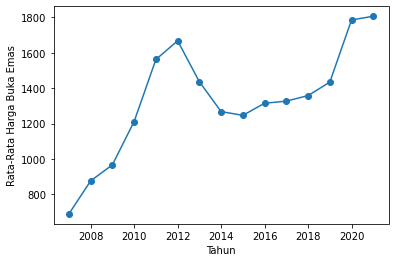

In [ ]:
#Pembuatan grafik rata-rata harga buka dengan tahunnya
plt.scatter(x, y)
plt.plot(x, y)
plt.xlabel('Tahun')
plt.ylabel('Rata-Rata Harga Buka Emas')

In [ ]:
#Regresi Linear Sederhana
linreg=LinearRegression()
x=np.array(x).reshape(-1,1) #Data tahun dimasukkan kedalam ordo matrix n*1
linreg.fit(x, y)

LinearRegression()

In [ ]:
Gold_2022=np.array(2022).reshape(-1,1) #Membuat data tahun baru yaitu tahun 2022
pred_ipm=linreg.predict(Gold_2022)

In [ ]:
print('\nPrediksi rata-rata Harga Buka Emas tahun 2022 =\n', pred_ipm.item())


Prediksi rata-rata Harga Buka Emas tahun 2022 =
 1746.26937950938


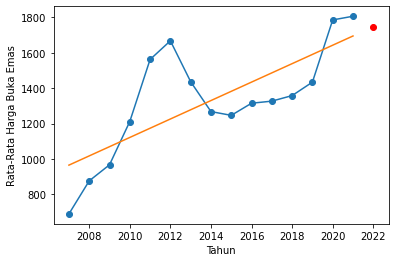

In [ ]:
plt.scatter(x, y)
plt.plot(x, y)
plt.xlabel('Tahun')
plt.ylabel('Rata-Rata Harga Buka Emas')
plt.scatter(Gold_2022, pred_ipm, c='red')
pred_y=linreg.predict(x)
plt.plot(x, pred_y)
plt.show()

In [ ]:
MSE=mean_squared_error(y,pred_y)
MAPE = mean_absolute_percentage_error(y, pred_y)
print('MSE = ', MSE)
print('MAPE =', MAPE)

MSE =  42417.29032839342
MAPE = 0.14104777799094415


In [ ]:
# Penjelasan Hasil Regresi Linier Sederhana
# Banyak sekali indikator rangkuman hasil olah data akan tetapi yang paling banyak digunakan adalah indikator MSE (Mean Squared Error) dan MAPE (Mean Absolute Percentage Error)
# Diantara 2 indikator di atas indikator MAPE yang paling mudah interpretasinya yaitu sebagai berikut
# Terlihat bahwa hasil output dari MAPE adalah 0.139xxx yang dimana hasil dari output tersebut cukup dikali 100% untuk mengetahui berapakah tingkat persentase kesalahan dari ke-akuratan peramalan menggunakan regresi linier, jadi hasil tingkat persentase kesalahannya adalah
#  0.139xxx * 100% = 13.9xxx% 
# Terbukti bahwa hasil tingkat persentase kesalahan dari peramalan menggunakan regresi linier adalah sebesar 13.9%
# lebih baik jika hasil tingkat persentase kesalahan kurang dari 10%

# =============================================================================================================

# Data Outlier
# Data Outlier adalah data pengamatan yang menyimpang dari rata-rata data pengamatan yang lain

dataIso = data[['Date','Volatility']] #Mengambil 2 kolom dari data yang diolah untuk mencari outlier dari volatility

In [ ]:
clf = IsolationForest(contamination=0.2) #Contamination adalah seberapa besar tingkat toleransi data yang menyimpang
pred = clf.fit_predict(dataIso)

In [ ]:
dataIso['Outlier']=pred.reshape(-1,1) #Data outlier dimasukkan kedalam ordo matrix n*1

<ipython-input-20-adb0f77f206e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataIso['Outlier']=pred.reshape(-1,1) #Data outlier dimasukkan kedalam ordo matrix n*1


In [ ]:
print(dataIso)

     Date  Volatility  Outlier
0    2021         1.9        1
1    2021         1.5        1
2    2021        -3.4       -1
3    2021         0.3       -1
4    2021         2.3       -1
..    ...         ...      ...
174  2007        -2.9       -1
175  2007         2.6        1
176  2007        -1.0        1
177  2007         2.7        1
178  2007         2.6        1

[179 rows x 3 columns]


In [ ]:
dataOutlier = dataIso['Volatility'].loc[dataIso['Outlier']==-1]
print('Data yang termasuk outlier:\n', dataOutlier.value_counts())

Data yang termasuk outlier:
  13.6    2
-4.2     1
 2.3     1
 11.0    1
 0.3     1
-7.0     1
 6.6     1
-11.4    1
 13.9    1
-12.1    1
 8.3     1
-7.2     1
-3.4     1
 9.9     1
 12.3    1
-1.0     1
 9.6     1
-2.9     1
 0.9     1
 6.1     1
-18.0    1
 7.7     1
 10.5    1
-5.8     1
-2.7     1
-2.0     1
 6.7     1
-10.3    1
-9.3     1
 10.0    1
 3.1     1
-6.5     1
 7.0     1
 10.4    1
-7.3     1
Name: Volatility, dtype: int64


In [ ]:
dataNoOutlier = dataIso['Volatility'].loc[dataIso['Outlier']==1]
print('Data yang tidak termasuk outlier:\n', dataNoOutlier.value_counts())

Data yang tidak termasuk outlier:
  2.6    5
 0.4    5
 3.7    4
-0.7    3
-0.3    3
       ..
-5.9    1
 4.2    1
 3.6    1
-3.4    1
 4.8    1
Name: Volatility, Length: 91, dtype: int64


Text(0.5, 1.0, 'Outlier Volatility Emas')

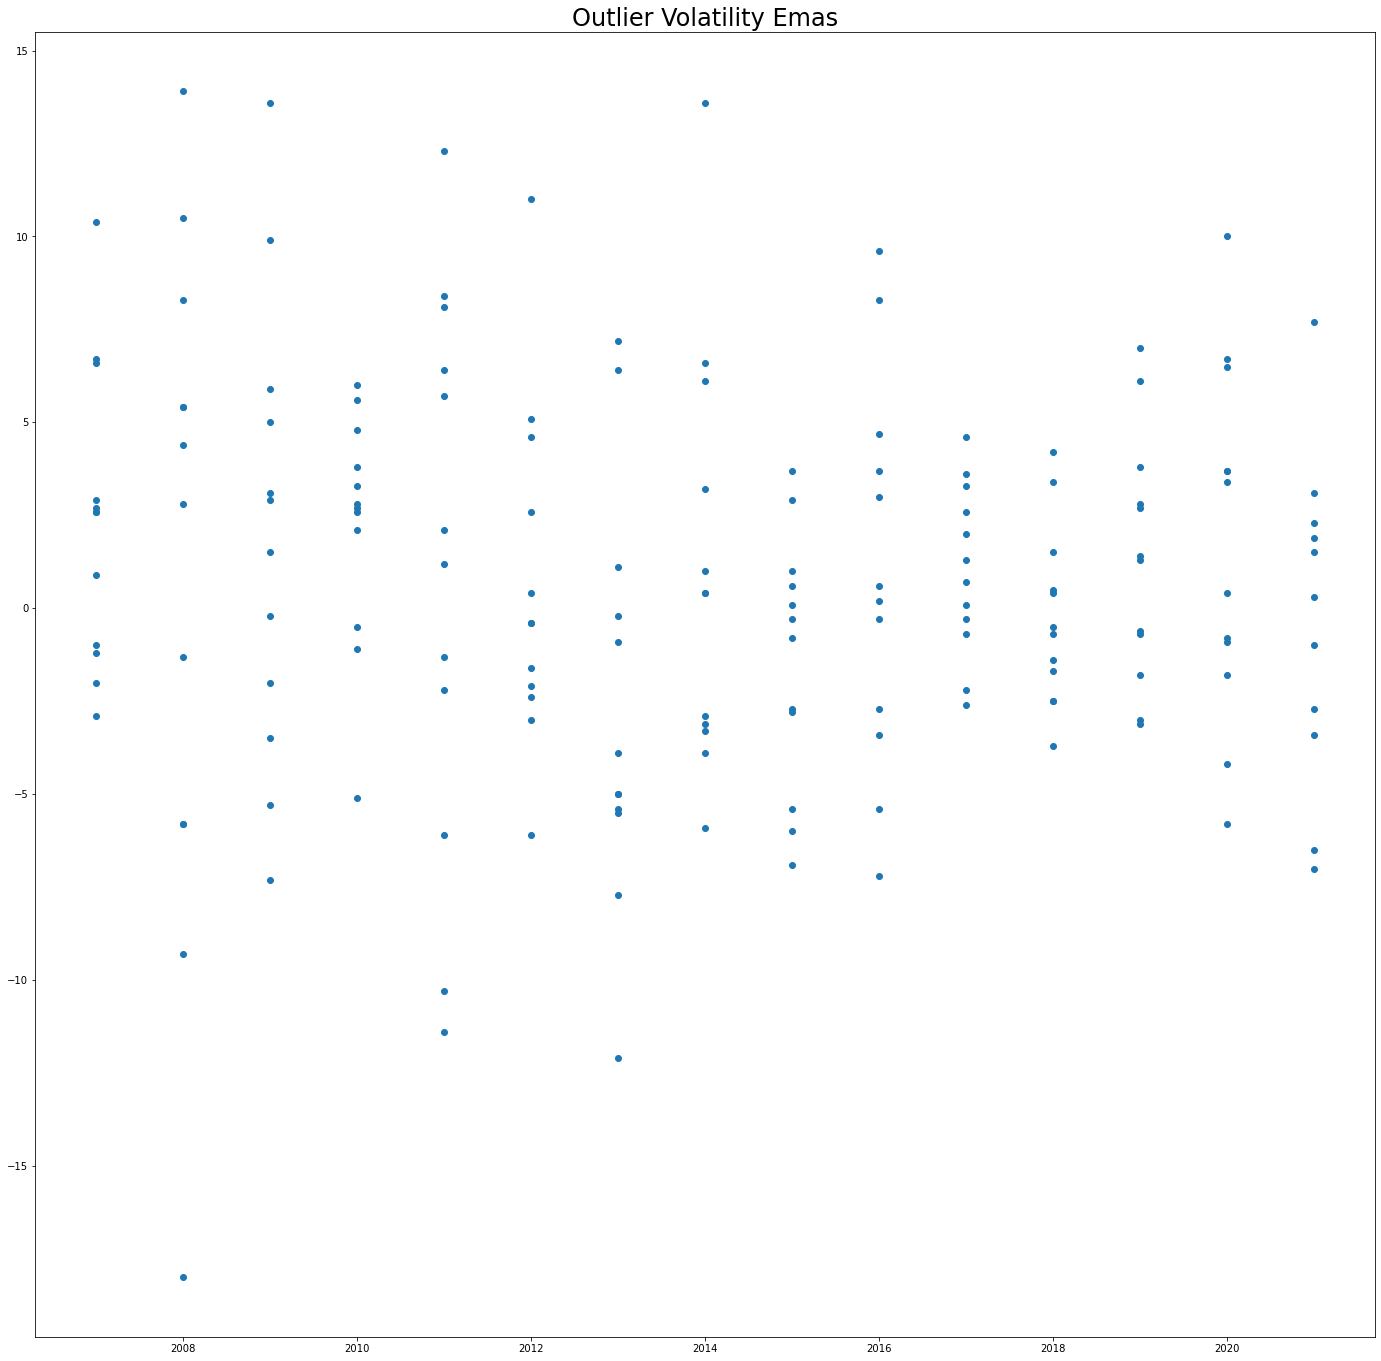

In [ ]:
plt.figure(figsize=(24,24))
plt.scatter(dataIso['Date'],dataIso['Volatility'])
plt.title('Outlier Volatility Emas', fontsize=24)